---
title: Lab 8
jupyter: python3
format:
    html:
        embed-resources: true
---

Lab 8: Linear Classifiers
Instructions
You will submit an HTML document to Canvas as your final version.

Your document should show your code chunks/cells as well as any output. Make sure that only relevant output is printed. Do not, for example, print the entire dataset in your final rendered file.

Your document should also be clearly organized, so that it is easy for a reader to find your answers to each question.

The Data
This week, we consider a dataset generated from text data.

The original dataset can be found here: https://www.kaggle.com/datasets/kingburrito666/cannabis-strains. It consists of user reviews of different strains of cannabis. Users rated their experience with the cannabis strain on a scale of 1 to 5. They also selected words from a long list to describe the Effects and the Flavor of the cannabis.

In the dataset linked above, each row is one strain of cannabis. The average rating of all testers is reported, as well as the most commonly used words for the effect and flavor.

Some data cleaning has been performed for you: The Effect and Flavor columns have been converted to dummy variables indicating if the particular word was used for the particular strain.

This cleaned data can be found at: https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv

Our goal will be to fit models that identify the Sativa types from the Indica types, and then to fit models that also distinguish the Hybrid types.

IMPORTANT: In this assignment, you do not need to consider different feature sets. Normally, this would be a good thing to try - but for this homework, simply include all the predictors for every model.

Part One: Binary Classification
Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

Report the (cross-validated!) metric.

Fit the final model.

Output a confusion matrix.

In [49]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix, accuracy_score)

In [50]:
url = "https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?dl=1"
cannabis = pd.read_csv(url)
cannabis.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
url = "https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?dl=1"
cannabis = pd.read_csv(url)

binary = cannabis[cannabis["Type"].isin(["indica", "sativa"])].copy()

X_bin = binary.select_dtypes(include=[np.number])
y_bin = binary["Type"]

X_bin = X_bin.dropna()
y_bin = y_bin.loc[X_bin.index]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_bin,
    y_bin,
    test_size=0.2,
    stratify=y_bin,
    random_state=1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


# LDA
Metric chosen: Accuracy

Reason: Neither Indica nor Sativa is the “positive” class" both classes are equally important. Therefore, accuracy which treats both classes symmetrically is the appropriate choice.

In [52]:
lda = LinearDiscriminantAnalysis()

lda_cv = cross_val_score(
    lda,
    Xb_train,
    yb_train,
    cv=cv,
    scoring="accuracy"
)

print("LDA - CV Accuracy:", lda_cv.mean())

lda.fit(Xb_train, yb_train)

yb_pred_lda = lda.predict(Xb_test)
print("LDA - Confusion Matrix (test):")
print(confusion_matrix(yb_test, yb_pred_lda, labels=["indica", "sativa"]))

LDA - CV Accuracy: 0.8377879605800013
LDA - Confusion Matrix (test):
[[122  16]
 [ 17  69]]


# QDA

Metric: Accuracy.

Reason: Just like with LDA, neither Indica nor Sativa is the “main” class, so we don’t want a metric that focuses on one of them. Accuracy treats both classes the same, which is exactly what we need here.

In [53]:
qda = QuadraticDiscriminantAnalysis()

qda_cv = cross_val_score(
    qda,
    Xb_train,
    yb_train,
    cv=cv,
    scoring="accuracy"
)

print("QDA - CV Accuracy:", qda_cv.mean())

qda.fit(Xb_train, yb_train)

yb_pred_qda = qda.predict(Xb_test)

print("QDA - Confusion Matrix (test):")
print(confusion_matrix(yb_test, yb_pred_qda, labels=["indica", "sativa"]))

QDA - CV Accuracy: 0.4048898374238905
QDA - Confusion Matrix (test):
[[  9 129]
 [  1  85]]


/Users/bastiaanweststrate/Desktop/GSB 544/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/Users/bastiaanweststrate/Desktop/GSB 544/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/Users/bastiaanweststrate/Desktop/GSB 544/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
/Users/bastiaanweststrate/Desktop/GSB 544/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of 

# SVC

Metric: Accuracy

Reason: Same idea as before: we don’t care more about Indica or Sativa, we just want the model to be right as often as possible overall. Accuracy treats both classes the same, so it makes sense here.
Hyperparameter tuning: For SVC I only tuned C, since that’s the main regularization parameter for the linear SVM.

In [54]:
svc_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC(kernel="linear", random_state=1))
])

svc_param_grid = {
    "svc__C": [0.01, 0.1, 1, 10, 100]
}

svc_search = GridSearchCV(
    svc_pipe,
    param_grid=svc_param_grid,
    cv=cv,
    scoring="accuracy"
)

svc_search.fit(Xb_train, yb_train)

print("SVC - Best Params:", svc_search.best_params_)
print("SVC - Best CV Accuracy:", svc_search.best_score_)

svc_best = svc_search.best_estimator_

yb_pred_svc = svc_best.predict(Xb_test)

print("SVC - Confusion Matrix (test):")
print(confusion_matrix(yb_test, yb_pred_svc, labels=["indica", "sativa"]))


SVC - Best Params: {'svc__C': 1}
SVC - Best CV Accuracy: 0.8433745527587723
SVC - Confusion Matrix (test):
[[119  19]
 [ 17  69]]


# SVM

Metric: Accuracy

Reason: Same story as before we don’t care more about Indica or Sativa, so accuracy makes sense because it treats both classes equally.
Hyperparameters: For the polynomial SVM, I tuned C (regularization strength) and degree (polynomial degree), since those are the main knobs that control how flexible the decision boundary is.

In [55]:
svm_poly_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("svm", SVC(kernel="poly", random_state=1))
])

svm_poly_param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__degree": [2, 3],
}

svm_poly_search = GridSearchCV(
    svm_poly_pipe,
    param_grid=svm_poly_param_grid,
    cv=cv,
    scoring="accuracy"
)

svm_poly_search.fit(Xb_train, yb_train)

print("SVM (poly) - Best Params:", svm_poly_search.best_params_)
print("SVM (poly) - Best CV Accuracy:", svm_poly_search.best_score_)

svm_poly_best = svm_poly_search.best_estimator_

yb_pred_svm_poly = svm_poly_best.predict(Xb_test)

print("SVM (poly) - Confusion Matrix (test):")
print(confusion_matrix(yb_test, yb_pred_svm_poly, labels=["indica", "sativa"]))

SVM (poly) - Best Params: {'svm__C': 10, 'svm__degree': 3}
SVM (poly) - Best CV Accuracy: 0.8299479003201305
SVM (poly) - Confusion Matrix (test):
[[121  17]
 [ 27  59]]


# Part Two: Natural Multiclass
Now use the full dataset, including the Hybrid strains.

Q1
Fit a decision tree, plot the final fit, and interpret the results.

Q2
Repeat the analyses from Part One for LDA, QDA, and KNN.

Q3
Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

In [56]:
full = cannabis[cannabis["Type"].isin(["indica", "sativa", "hybrid"])].copy()

X_full = full.select_dtypes(include=[np.number])

y_full = full["Type"]

X_full = X_full.dropna()
y_full = y_full.loc[X_full.index]


X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full,
    y_full,
    test_size=0.2,
    stratify=y_full,
    random_state=1
)

cv_full = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Q1 Decision Tree

Decision Tree - Best Params: {'max_depth': 3, 'min_samples_leaf': 10}
Decision Tree - Best CV Accuracy: 0.6166092258748674
Decision Tree - Confusion Matrix (test):
[[ 94   2  41]
 [  3  37  46]
 [ 35  37 166]]
Decision Tree - Test Accuracy: 0.6442516268980477


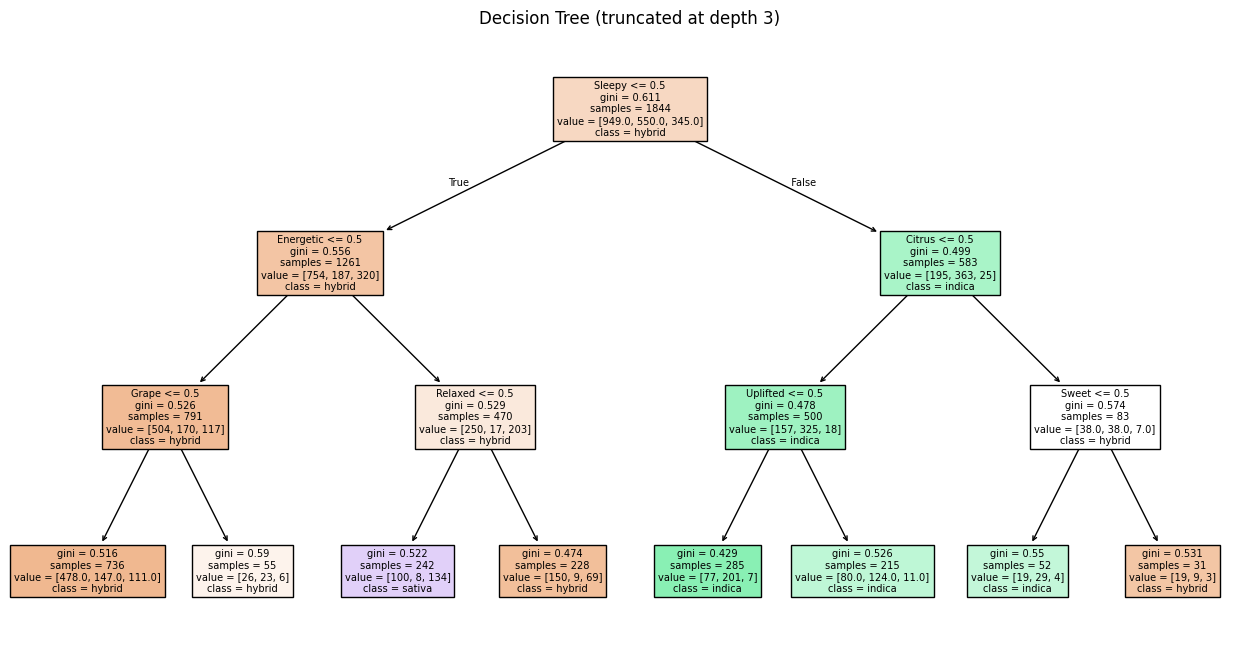

In [ ]:
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier(random_state=1)

param_grid_dt = {
    "max_depth": [3, 4, 5, 6, None],
    "min_samples_leaf": [1, 5, 10]
}

dt_search = GridSearchCV(
    dt,
    param_grid=param_grid_dt,
    cv=cv_full,
    scoring="accuracy"
)

dt_search.fit(X_train_full, y_train_full)

print("Decision Tree - Best Params:", dt_search.best_params_)
print("Decision Tree - Best CV Accuracy:", dt_search.best_score_)

dt_best = dt_search.best_estimator_

y_pred_dt = dt_best.predict(X_test_full)

print("Decision Tree - Confusion Matrix (test):")
print(confusion_matrix(y_test_full, y_pred_dt, labels=["indica", "sativa", "hybrid"]))

print("Decision Tree - Test Accuracy:", accuracy_score(y_test_full, y_pred_dt))

plt.figure(figsize=(16, 8))
plot_tree(
    dt_best,
    feature_names=X_full.columns,
    class_names=dt_best.classes_,
    filled=True,
    max_depth=3   
)
plt.title("Decision Tree (truncated at depth 3)")
plt.show()

# Q2 LDA

In [58]:
lda_multi = LinearDiscriminantAnalysis()

lda_cv_full = cross_val_score(
    lda_multi,
    X_train_full,
    y_train_full,
    cv=cv_full,
    scoring="accuracy"
)

print("LDA (multiclass) - CV Accuracy:", lda_cv_full.mean())

lda_multi.fit(X_train_full, y_train_full)
y_pred_lda_full = lda_multi.predict(X_test_full)

print("LDA (multiclass) - Confusion Matrix (test):")
print(confusion_matrix(y_test_full, y_pred_lda_full, labels=["indica", "sativa", "hybrid"]))

print("LDA (multiclass) - Test Accuracy:", accuracy_score(y_test_full, y_pred_lda_full))

LDA (multiclass) - CV Accuracy: 0.6171276658418758
LDA (multiclass) - Confusion Matrix (test):
[[ 95   2  40]
 [  4  39  43]
 [ 38  48 152]]
LDA (multiclass) - Test Accuracy: 0.6203904555314533


# Q2 QDA

In [59]:
qda_multi_base = QuadraticDiscriminantAnalysis()

qda_param_grid = {
    "reg_param": [0.01, 0.05, 0.1, 0.2]
}

qda_multi_search = GridSearchCV(
    qda_multi_base,
    param_grid=qda_param_grid,
    cv=cv_full,
    scoring="accuracy"
)

qda_multi_search.fit(X_train_full, y_train_full)

print("QDA (multiclass) - Best Params:", qda_multi_search.best_params_)
print("QDA (multiclass) - Best CV Accuracy:", qda_multi_search.best_score_)

qda_multi_best = qda_multi_search.best_estimator_

y_pred_qda_full = qda_multi_best.predict(X_test_full)

print("QDA (multiclass) - Confusion Matrix (test):")
print(confusion_matrix(y_test_full, y_pred_qda_full, labels=["indica", "sativa", "hybrid"]))

print("QDA (multiclass) - Test Accuracy:", accuracy_score(y_test_full, y_pred_qda_full))

QDA (multiclass) - Best Params: {'reg_param': 0.2}
QDA (multiclass) - Best CV Accuracy: 0.6133424649463886
QDA (multiclass) - Confusion Matrix (test):
[[103   1  33]
 [  3  34  49]
 [ 41  31 166]]
QDA (multiclass) - Test Accuracy: 0.6572668112798264


# Q2 KNN

In [60]:

knn_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

knn_param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(
    knn_pipe,
    param_grid=knn_param_grid,
    cv=cv_full,
    scoring="accuracy"
)

knn_search.fit(X_train_full, y_train_full)

print("KNN (multiclass) - Best Params:", knn_search.best_params_)
print("KNN (multiclass) - Best CV Accuracy:", knn_search.best_score_)

knn_best = knn_search.best_estimator_

y_pred_knn_full = knn_best.predict(X_test_full)

print("KNN (multiclass) - Confusion Matrix (test):")
print(confusion_matrix(y_test_full, y_pred_knn_full, labels=["indica", "sativa", "hybrid"]))

print("KNN (multiclass) - Test Accuracy:", accuracy_score(y_test_full, y_pred_knn_full))

KNN (multiclass) - Best Params: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
KNN (multiclass) - Best CV Accuracy: 0.5520516672558029
KNN (multiclass) - Confusion Matrix (test):
[[ 67   1  69]
 [  4  19  63]
 [ 41  33 164]]
KNN (multiclass) - Test Accuracy: 0.5422993492407809


# Q3

The metrics in the multiclass section were worse than in Part One. That makes sense because separating three classes is harder than just Indica vs. Sativa. Hybrid especially causes problems it overlaps a lot with both Indica and Sativa, so all the models ended up confusing Hybrid with the other two. Indica and Sativa stayed more distinct, but Hybrid got mixed up the most, which is exactly what you’d expect based on how similar the strains are.

# Part Three: Multiclass from Binary

# Q1

In [64]:
labels = ["indica", "sativa", "hybrid"]

svc = Pipeline([("scale", StandardScaler()), ("svc", SVC(kernel="linear"))])
log = Pipeline([("scale", StandardScaler()), ("log", LogisticRegression(max_iter=500))])

for lab in labels:
    y_train_bin = (y_train_full == lab).astype(int)
    y_test_bin = (y_test_full == lab).astype(int)

    svc.fit(X_train_full, y_train_bin)
    log.fit(X_train_full, y_train_bin)

    y_pred_svc = svc.predict(X_test_full)
    y_pred_log = log.predict(X_test_full)

    print(f"\n{lab} vs Rest:")
    print("SVC accuracy:", accuracy_score(y_test_bin, y_pred_svc))
    print("LogReg accuracy:", accuracy_score(y_test_bin, y_pred_log))


indica vs Rest:
SVC accuracy: 0.8221258134490239
LogReg accuracy: 0.8373101952277657

sativa vs Rest:
SVC accuracy: 0.824295010845987
LogReg accuracy: 0.8177874186550976

hybrid vs Rest:
SVC accuracy: 0.6507592190889371
LogReg accuracy: 0.6377440347071583


Q2:
The best model was Logistic Regression on Indica vs Rest that one got the highest accuracy. The worst were both models on Hybrid vs Rest, which makes sense because Hybrid overlaps a lot with both Indica and Sativa, so it’s harder to separate cleanly.

# Q3

In [63]:
pairs = [
    ("indica", "sativa"),
    ("indica", "hybrid"),
    ("hybrid", "sativa")
]

for a, b in pairs:
    mask_train = y_train_full.isin([a, b])
    mask_test  = y_test_full.isin([a, b])

    Xtr = X_train_full[mask_train]
    Xte = X_test_full[mask_test]

    ytr = (y_train_full[mask_train] == b).astype(int)
    yte = (y_test_full[mask_test] == b).astype(int)

    # SVC
    svc = SVC(kernel="linear")
    svc.fit(Xtr, ytr)

    # Logistic
    log = LogisticRegression(max_iter=500)
    log.fit(Xtr, ytr)

    print(f"\n{a} vs {b}:")
    print("SVC:", accuracy_score(yte, svc.predict(Xte)))
    print("LogReg:", accuracy_score(yte, log.predict(Xte)))


indica vs sativa:
SVC: 0.874439461883408
LogReg: 0.8789237668161435

indica vs hybrid:
SVC: 0.7893333333333333
LogReg: 0.7866666666666666

hybrid vs sativa:
SVC: 0.7222222222222222
LogReg: 0.7376543209876543


Q4:
The best results came from the Indica vs Sativa models both SVC and Logistic hit the highest accuracy there. The worst were the Hybrid vs Sativa models, which had the lowest scores of the six. And yeah, that makes sense: Indica and Sativa are the easiest two to separate, while Hybrid overlaps a lot with both, so any pair that includes Hybrid is naturally harder to classify.

Q5:
If I passed the full three-class target straight into LogisticRegression, it would use a one-vs-rest (OvR) setup by default (at least in the way we’ve been using it in class).

SVC, on the other hand, uses one-vs-one (OvO) internally for multiclass problems, so it would automatically build pairwise classifiers between the classes.